In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, f1_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

In [2]:
N = 13
bin_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
target_col = bin_cols[N % 8]
print(target_col)

anime


In [3]:
data = pd.read_csv("./datasets/famcs_students.csv")

In [4]:
print(data.head())

   cource  group                  stream sex   age   ss          interest  \
0       4     11  Прикладная информатика   М  20.0  Нет        Математика   
1       4     11  Прикладная информатика   Ж  20.0  Нет  Программирование   
2       4     11  Прикладная информатика   Ж  19.0  Нет  Программирование   
3       4     11  Прикладная информатика   Ж  20.0  Нет        Математика   
4       4     11  Прикладная информатика   М  20.0  Нет        Математика   

        os weekend_study bad_sleep  ...      social  \
0    MacOS            Да        Да  ...  Экстраверт   
1    MacOS           Нет       Нет  ...  Экстраверт   
2    MacOS            Да       Нет  ...  Экстраверт   
3    MacOS            Да        Да  ...  Экстраверт   
4  Windows            Да       Нет  ...   Интроверт   

                       sport  miss  study_form foot_size eye_color score  \
0  Редко, легкая физкультура   3.0      Бюджет      48.0     Карие   9.2   
1            Да, я спортсмен   5.0      Бюджет      39

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cource           127 non-null    int64  
 1   group            127 non-null    int64  
 2   stream           127 non-null    object 
 3   sex              127 non-null    object 
 4   age              127 non-null    float64
 5   ss               127 non-null    object 
 6   interest         127 non-null    object 
 7   os               127 non-null    object 
 8   weekend_study    127 non-null    object 
 9   bad_sleep        127 non-null    object 
 10  glasses          127 non-null    object 
 11  work_experience  127 non-null    object 
 12  ai               127 non-null    object 
 13  height           127 non-null    float64
 14  anime            127 non-null    object 
 15  social           127 non-null    object 
 16  sport            127 non-null    object 
 17  miss            

In [6]:
display(data.describe())

,cource,group,age,height,miss,foot_size,score
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.952756,6.118110,20.433071,178.751969,7.850394,41.953741,7.555433
std,0.213001,4.460789,1.394949,13.360222,8.716276,3.389107,1.460913
min,3.000000,1.000000,16.000000,100.000000,0.000000,34.125120,0.000000
25%,4.000000,2.000000,20.000000,170.000000,3.000000,39.000000,7.000000
50%,4.000000,4.000000,20.000000,179.000000,5.000000,42.000000,7.600000
75%,4.000000,11.000000,21.000000,187.000000,10.000000,45.000000,8.450000
max,4.000000,13.000000,30.000000,220.000000,40.000000,50.000000,10.000000


In [7]:
data.isnull().sum()

cource             0
group              0
stream             0
sex                0
age                0
ss                 0
interest           0
os                 0
weekend_study      0
bad_sleep          0
glasses            0
work_experience    0
ai                 0
height             0
anime              0
social             0
sport              0
miss               0
study_form         0
foot_size          0
eye_color          0
score              0
retake             0
hostel             0
literature         0
dtype: int64

In [8]:
num_columns = ["miss", "score"]
cat_columns = ["sex", "weekend_study", "bad_sleep", "glasses", "work_experience", "social", "sport", "study_form", "retake", "literature"]

In [9]:
feature_cols = ["miss", "score", "sex", "weekend_study", "bad_sleep", "glasses", "work_experience", "social", "sport", "study_form", "retake", "literature", "anime"]
X = data[feature_cols]
y = data[target_col]

In [10]:
Q1_miss = X['miss'].quantile(0.25)
Q3_miss = X['miss'].quantile(0.75)
IQR_miss = Q3_miss - Q1_miss
lower_bound_miss = Q1_miss - 1.5 * IQR_miss
upper_bound_miss = Q3_miss + 1.5 * IQR_miss

outliers_miss = X[(data['miss'] < lower_bound_miss) | (X['miss'] > upper_bound_miss)]
print(f"Количество выбросов в Miss: {len(outliers_miss)}")
print(f"Выбросы Miss:\n{outliers_miss[['miss']].head()}")

Q1_score = X['score'].quantile(0.25)
Q3_score = X['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

outliers_score = X[(data['score'] < lower_bound_score) | (X['score'] > upper_bound_score)]
print(f"Количество выбросов в score: {len(outliers_score)}")
print(f"Выбросы score:\n{outliers_score[['score']].head()}")

X = X[
    (X['miss'] >= lower_bound_miss) & (X['miss'] <= upper_bound_miss) 
    & (X['score'] >= lower_bound_score) & (X['score'] <= upper_bound_score)
]

Количество выбросов в Miss: 8
Выбросы Miss:
    miss
30  40.0
31  40.0
33  30.0
38  25.0
43  40.0
Количество выбросов в score: 3
Выбросы score:
    score
30    0.0
68    4.5
96    0.0


In [11]:
X_processed = X.copy()
y = X_processed['anime']
X_processed = X_processed.drop('anime', axis=1)
X = pd.get_dummies(X_processed, columns=cat_columns, drop_first=True)
X = X.astype(float)
y = y.map({'Да': 1, 'Нет': 0})
display(X)


,miss,score,sex_М,weekend_study_Нет,bad_sleep_Нет,glasses_Нет,work_experience_Меньше года,work_experience_Не работаю,work_experience_более 2 лет,social_Социофоб,social_Экстраверт,"sport_Да, я спортсмен","sport_Редко, легкая физкультура",study_form_Платная,retake_1,retake_2+,literature_Нет
0,3.0,9.20,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5.0,8.80,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10.0,8.80,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,8.80,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,9.00,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1.0,6.29,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.0,6.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
124,10.0,7.00,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
125,1.0,7.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [12]:
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    shuffle=True,
    stratify=y  
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test,
    test_size=0.5, 
    random_state=42,
    shuffle=True,
    stratify=y_val_test  
)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_np = np.array(X_train, dtype=np.float64)
X_val_np = np.array(X_val, dtype=np.float64)
X_test_np = np.array(X_test, dtype=np.float64)
y_train_np = np.array(y_train, dtype=np.int64)
y_val_np = np.array(y_val, dtype=np.int64)
y_test_np = np.array(y_test, dtype=np.int64)

### Матрица ошибок (Confusion Matrix)

Матрица ошибок — это таблица, показывающая количество правильных и неправильных предсказаний:

|                | Предсказано: 0 | Предсказано: 1 |
|----------------|----------------|----------------|
| **Реально: 0** | TN (True Negative) | FP (False Positive) |
| **Реально: 1** | FN (False Negative) | TP (True Positive) |

где:
- **TP (True Positive)** — правильно предсказанные положительные классы
- **TN (True Negative)** — правильно предсказанные отрицательные классы
- **FP (False Positive)** — неправильно предсказанные положительные (ошибка I рода)
- **FN (False Negative)** — неправильно предсказанные отрицательные (ошибка II рода)

### Основные метрики:

#### 1. Accuracy (Точность)
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Доля правильных предсказаний среди всех предсказаний.

#### 2. Precision (Точность предсказания)
$$Precision = \frac{TP}{TP + FP}$$

Доля правильных положительных предсказаний среди всех предсказанных положительных. Из всех объектов, которые модель назвала положительными, сколько действительно положительные?

#### 3. Recall (Полнота, чувствительность)
$$Recall = \frac{TP}{TP + FN}$$

Доля найденных положительных объектов среди всех реально положительных. Из всех реально положительных объектов, сколько модель нашла?

#### 4. F1-score (F-мера)
$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

Гармоническое среднее между Precision и Recall. Балансирует между точностью и полнотой, особенно полезно при несбалансированных классах.

#### 5. ROC-AUC (Area Under ROC Curve)

Площадь под ROC-кривой, которая показывает зависимость True Positive Rate (TPR) от False Positive Rate (FPR) при различных порогах классификации.

- **TPR (Sensitivity)** = Recall = $\frac{TP}{TP + FN}$
- **FPR (1 - Specificity)** = $\frac{FP}{FP + TN}$

**Интерпретация**:
- AUC = 1.0 — идеальная модель
- AUC = 0.5 — случайное угадывание
- AUC < 0.5 — модель работает хуже случайного

In [14]:
def evaluate_model(y_true, y_pred, y_scores=None, model_name=""):
    print(f"\n{'='*65}")
    print(f"Оценка модели: {model_name}")
    print(f"{'='*65}")
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    
    if y_scores is not None:
        auc = roc_auc_score(y_true, y_scores)
        print(f"ROC-AUC:   {auc:.4f}")
    
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nМатрица ошибок:")
    print(f"              Предсказано")
    print(f"              0      1")
    print(f"Реально 0   {cm[0,0]:4d}  {cm[0,1]:4d}")
    print(f"        1   {cm[1,0]:4d}  {cm[1,1]:4d}")
    
    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'confusion_matrix': cm
    }

In [15]:
class TrivialClassifier:
    def __init__(self):
        self.most_frequent_class = None
    
    def fit(self, X, y):
        self.most_frequent_class = y.mode()[0]
        return self
    
    def predict(self, X):
        return np.array([self.most_frequent_class] * len(X))
    
    def predict_proba(self, X):
        prob = np.zeros((len(X), 2))
        prob[:, self.most_frequent_class] = 1.0
        return prob

In [16]:
trivial = TrivialClassifier()
trivial.fit(X_train, y_train)
y_pred_trivial = trivial.predict(X_test)
print(y_pred_trivial)
y_scores_trivial = trivial.predict_proba(X_test)[:, 1]

results_trivial = evaluate_model(y_test, y_pred_trivial, y_scores_trivial, "Тривиальный классификатор")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Оценка модели: Тривиальный классификатор
Accuracy:  0.6111
Precision: 0.0000
Recall:    0.0000
F1-score:  0.0000
ROC-AUC:   0.5000

Матрица ошибок:
              Предсказано
              0      1
Реально 0     11     0
        1      7     0


In [17]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        classes, cls_counts = np.unique(y, return_counts=True)
        n_classes = len(classes)
        self.priors = cls_counts / len(y)

        # calculate the mean and standard deviations of features by classes
        self.X_cls_mean = np.array([np.mean(X[y == c], axis=0) for c in range(n_classes)])
        self.X_stds = np.array([np.std(X[y == c], axis=0) for c in range(n_classes)])

    # calculate the probability density of the feature according to the Gaussian distribution
    def pdf(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def predict(self, X):
        pdfs = np.array([self.pdf(x, self.X_cls_mean, self.X_stds) for x in X])
        posteriors = self.priors * np.prod(pdfs, axis=2)   # shorten Bayes formula

        return np.argmax(posteriors, axis=1)

    def predict_proba(self, X):
        pdfs = np.array([self.pdf(x, self.X_cls_mean, self.X_stds) for x in X])
        likelihoods = np.prod(pdfs, axis=2)
        posteriors = self.priors * likelihoods
        # Нормализуем вероятности
        posteriors = posteriors / np.sum(posteriors, axis=1, keepdims=True)
        return posteriors

In [23]:
nb_clf = GaussianNaiveBayes()
nb_clf.fit(X_train, y_train)
nb_clf_pred_res = nb_clf.predict(X_test)
y_scores_nb = nb_clf.predict_proba(X_test)[:, 1]
print(nb_clf_pred_res)
results_nb = evaluate_model(y_test, nb_clf_pred_res, y_scores_nb, "Наивный байесовский классификатор")

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]

Оценка модели: Наивный байесовский классификатор
Accuracy:  0.3333
Precision: 0.3529
Recall:    0.8571
F1-score:  0.5000
ROC-AUC:   0.5584

Матрица ошибок:
              Предсказано
              0      1
Реально 0      0    11
        1      1     6


In [19]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=5, regression=False):
        self.n_neighbors = n_neighbors
        self.regression = regression

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train, dtype=np.float64)
        self.y_train = np.array(y_train, dtype=np.int64)

    def _euclidean_distances(self, x_test_i):
        x_test_i = np.array(x_test_i, dtype=np.float64)
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]

        return np.mean(targets) if self.regression else np.bincount(targets).argmax()

    def predict(self, X_test):
        X_test = np.array(X_test, dtype=np.float64)
        return np.array([self._make_prediction(x) for x in X_test])
    
    def predict_proba(self, X_test):
        X_test = np.array(X_test, dtype=np.float64)
        probabilities = []
        
        for x in X_test:
            distances = self._euclidean_distances(x)
            k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
            targets = self.y_train[k_nearest_indexes]
            
            # Считаем вероятности как долю каждого класса среди k соседей
            class_counts = np.bincount(targets, minlength=2)  # minlength=2 для бинарной классификации
            prob = class_counts / self.n_neighbors
            probabilities.append(prob)
        
        return np.array(probabilities)

In [24]:
best_k = None
best_acc = 0
for k in range(1, 22):
    knn = KNearestNeighbors(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    if acc > best_acc:
        best_acc = acc
        best_k = k


print(f"Best k = {best_k} (val accuracy = {best_acc:.3f})")

knn_best = KNearestNeighbors(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
y_scores_knn = knn.predict_proba(X_test)[:, 1]
print(y_pred_knn)
results_knn = evaluate_model(y_test, y_pred_knn, y_scores_knn, f"KNN (n_neighbors={best_k})")

Best k = 8 (val accuracy = 0.611)
[0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0]

Оценка модели: KNN (n_neighbors=8)
Accuracy:  0.3889
Precision: 0.1667
Recall:    0.1429
F1-score:  0.1538
ROC-AUC:   0.5390

Матрица ошибок:
              Предсказано
              0      1
Реально 0      6     5
        1      6     1


In [21]:
class GDLogisticRegression:
    def __init__(self, learning_rate=0.1, tolerance=0.00001, max_iter=1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias, self.weights = 0, np.zeros(n_features)
        previous_db, previous_dw = 0, np.zeros(n_features)

        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
            db = 1 / n_samples * np.sum(y_pred_sigmoid - y)
            dw = 1 / n_samples * X.T @ (y_pred_sigmoid - y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction < self.tolerance:
                if abs_dw_reduction.all() < self.tolerance:
                    break

            previous_db = db
            previous_dw = dw

    def predict_proba(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
        return y_pred_sigmoid

    def predict(self, X_test, threshold=0.5):
        probabilities = self.predict_proba(X_test)
        return (probabilities >= threshold).astype(int)



Лучший порог: 0.1984 (F1-score: 0.7000)
[1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1]

Оценка модели: Логистическая регрессия (порог=0.1984)
Accuracy:  0.6111
Precision: 0.5000
Recall:    0.8571
F1-score:  0.6316
ROC-AUC:   0.6234

Матрица ошибок:
              Предсказано
              0      1
Реально 0      5     6
        1      1     6


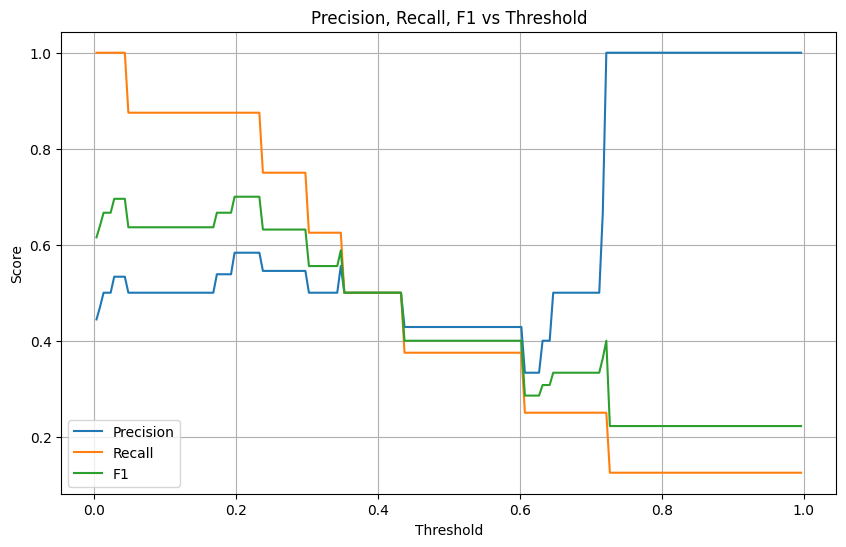

In [28]:
logistic_regression = GDLogisticRegression()
logistic_regression.fit(X_train, y_train)

y_val_proba = logistic_regression.predict_proba(X_val)

best_threshold = 0.5
best_f1 = 0
thresholds = np.linspace(np.min(y_val_proba), np.max(y_val_proba), 200)

for threshold in thresholds:
    y_val_pred = (y_val_proba >= threshold).astype(int)
    f1 = f1_score(y_val, y_val_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Лучший порог: {best_threshold:.4f} (F1-score: {best_f1:.4f})")

y_test_proba = logistic_regression.predict_proba(X_test)
y_pred_lr = (y_test_proba >= best_threshold).astype(int)
y_scores_lr = y_test_proba
print(y_pred_lr)

results_lr = evaluate_model(y_test, y_pred_lr, y_scores_lr, f"Логистическая регрессия (порог={best_threshold:.4f})")

precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    preds = (y_val_proba >= t).astype(int)
    precisions.append(precision_score(y_val, preds))
    recalls.append(recall_score(y_val, preds))
    f1_scores.append(f1_score(y_val, preds))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1_scores, label="F1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()